Segmentation
The goal of this assignment is to implement two basic segmentation algorithms and a simple post processing one.

1. The k-means algorithm for grey-scale images, first with k = 2, then with larger ks, via Lloyd’s algorithm. Handling scalar values should be easy!


2. The Otsu’s thresholding algorithm (for a single threshold) following the description provided on the slides or the paper of N. Otsu which you can find in Absalon.


3. A cleaning/denoising algorithm, briefly described in the slides for removing small holes in the segmentations. At each interior pixel compute how many of its neighbours are of a given label. If enough of them “vote” for a given label, this pixel (in the cleaned segmentation) is given the majority value. The threshold on the number of votes is a parameter of the algorithm. It could be: all neighbours, or 2/3 of them etc.

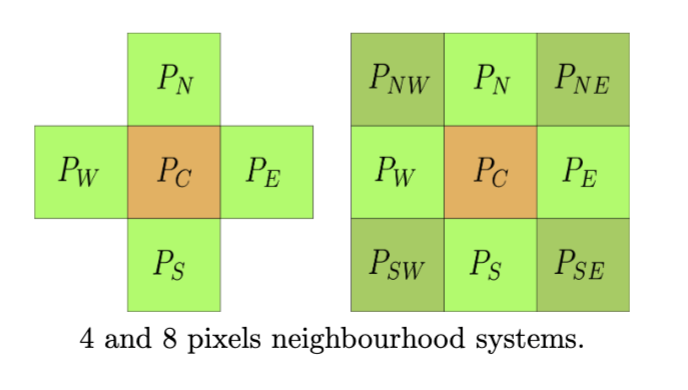

You will allow for either 4-pixels or 8-pixels neighbourhoods. It should be possible to
iterate this algorithm a certain amount of time, and this should be a parameter in
your implementation.

You will use several images provided to you on Absalon in the Images Data folder, and you
are welcome to use other grey-scale images of your choice, or a colour one that you convert
to grey-scale.

- Run your implementations of k-means and Otsu on Absalon’s images and one or more of your choice.

- Comment on their similarity, dissimilarities?

- Run several iterations of the segmentation denoising algorithm with varying voting thresholds values. Comment on the results.

- Run a k-means segmentation with k > 2. Can it help with the page image?

- Can you imagine a way to generalise the segmentation denoising algorithm to more than 2 segments? Comment on it.

- You may want to try some of the algorithms available in scikit-learn, such as the Chan-Vese segmentation.


Here are the 4 images provided to you for this assignment. Image 3, a micro-tomographic
slice of a rock sample, has been strongly reduced in size (the original is 2560x2560 pixels).

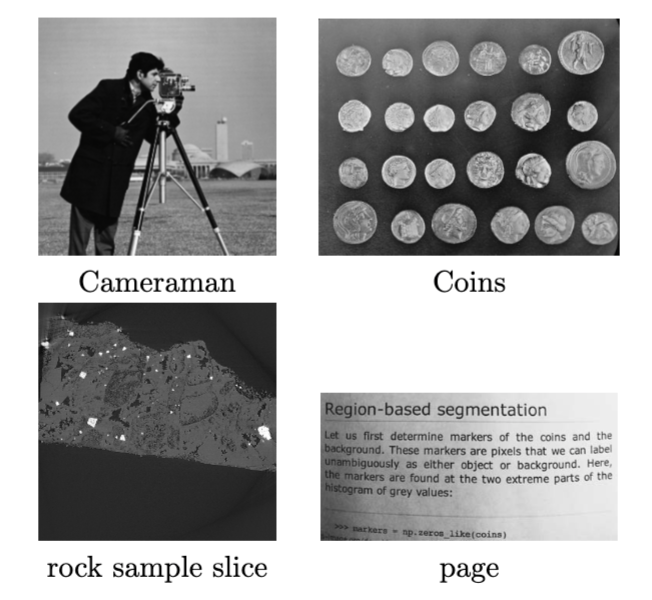

In [3]:
import os
import cv2
from scipy.cluster.vq import vq, kmeans, whiten
import numpy as np
import skimage
import matplotlib.pyplot as plt
import collections

In [4]:
path = "data"
images = [cv2.imread(os.path.join(path,filename)) for filename in os.listdir(path)]
image = images[0]

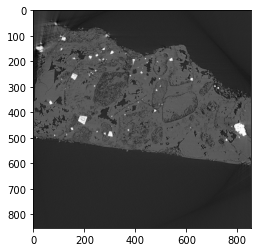

In [5]:
plt.imshow(images[0], cmap = "Greys")

### K-means segmentation

[[58 58 58]
 [58 58 58]
 [58 58 58]
 ...
 [58 58 58]
 [58 58 58]
 [58 58 58]]


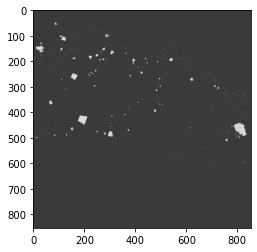

In [17]:
from matplotlib.colors import LinearSegmentedColormap

vectorized = image.reshape((-1, 3))
vectorized = np.float32(vectorized)

retval, labels, centers = cv2.kmeans(vectorized, 
                                     2, 
                                     None, 
                                     None, 
                                     None, 
                                     None)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
print(segmented_data)

colors = ['red', 'brown', 'yellow', 'green', 'blue']
cmap = LinearSegmentedColormap.from_list('name', colors)
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
plt.imshow(segmented_image)

In [ ]:
centroids, distortion = kmeans(whiten(vectorized), 2)
k_group_idx, _ = vq(whiten(vectorized), centroids)

centers = np.uint8(centroids)
segmented_data = centers[k_group_idx.flatten()]
segmented_scipy = segmented_data.reshape((image.shape))

plt.imshow(segmented_scipy) #,cmap="Greys")